In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

In [2]:
# 1) Load dataset
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)


In [3]:
# 2) Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [4]:
# 3) Scale data (important for SVM and Logistic)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [5]:
# 4) Model list
models = {
    "Naive Bayes": GaussianNB(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(),
    "Logistic Regression": LogisticRegression(max_iter=500)
}

results = {}

In [6]:
# 5) Train & Evaluate
for name, model in models.items():
    print(f"\n📌 Training: {name}")

    if name in ["SVM", "Logistic Regression"]:
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    results[name] = acc

    print(f"Accuracy: {acc:.4f}")
    print(classification_report(y_test, y_pred))


📌 Training: Naive Bayes
Accuracy: 0.9737
              precision    recall  f1-score   support

           0       1.00      0.93      0.96        43
           1       0.96      1.00      0.98        71

    accuracy                           0.97       114
   macro avg       0.98      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114


📌 Training: Random Forest
Accuracy: 0.9649
              precision    recall  f1-score   support

           0       0.98      0.93      0.95        43
           1       0.96      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114


📌 Training: SVM
Accuracy: 0.9825
              precision    recall  f1-score   support

           0       1.00      0.95      0.98        43
           1       0.97      1.00      0.99        71

    accuracy                           0.98       114
   macro

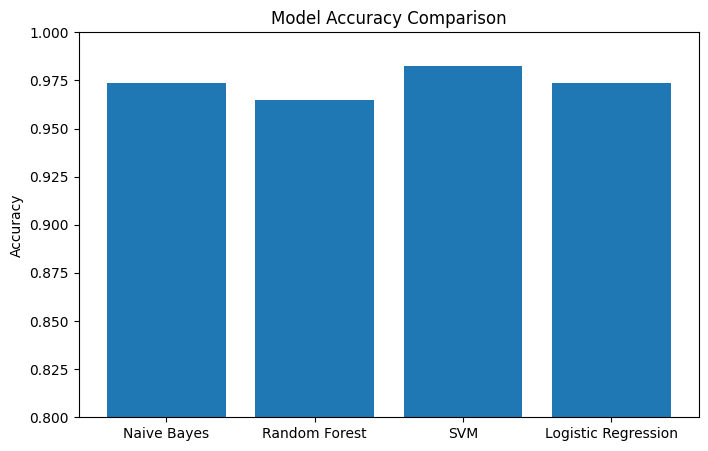

In [7]:
# 6) Accuracy comparison bar chart
plt.figure(figsize=(8,5))
plt.bar(results.keys(), results.values())
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.ylim(0.80, 1.00)
plt.show()

In [8]:
# 7) Confusion matrix of best model
best_model = max(results, key=results.get)
print(f"\n Best model: {best_model} with Accuracy = {results[best_model]:.4f}")


 Best model: SVM with Accuracy = 0.9825


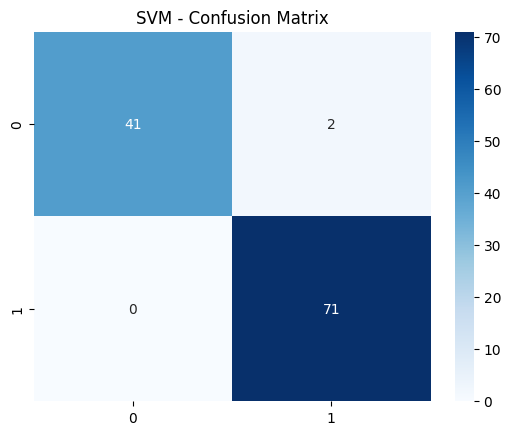

In [9]:
# Re-predict for confusion matrix
if best_model in ["SVM", "Logistic Regression"]:
    best_clf = models[best_model].fit(X_train_scaled, y_train)
    y_best_pred = best_clf.predict(X_test_scaled)
else:
    best_clf = models[best_model].fit(X_train, y_train)
    y_best_pred = best_clf.predict(X_test)

cm = confusion_matrix(y_test, y_best_pred)

sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title(f"{best_model} - Confusion Matrix")
plt.show()